### 📌 프로젝트 주제   
> 깨진 달걀과 안깨진 달걀 이미지 분류 (이진분류)
> 
> 저용량 데이터

In [110]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 224
BATCH_SIZE = 32

idg = ImageDataGenerator()

original_dir = './datasets/Eggs Classification/original/'
original_generator = idg.flow_from_directory(original_dir,
                                             target_size=(IMAGE_SIZE, IMAGE_SIZE), 
                                             batch_size=BATCH_SIZE,
                                             class_mode='binary', 
                                             shuffle=True)

print(original_generator.class_indices)

Found 794 images belonging to 2 classes.
{'Damaged': 0, 'Not Damaged': 1}


#### ✨ "깨진 달걀" , "안깨진 달걀"로 나눠진 이진분류 데이터임을 알 수 있습니다.

In [111]:
target_name = {v: k for k, v in original_generator.class_indices.items()}
target_name

{0: 'Damaged', 1: 'Not Damaged'}

In [112]:
original_target_names = []

for target in original_generator.classes:
    original_target_names.append(target_name[target])
print(original_target_names.__len__())

794


#### ✨ 총 794개의 데이터가 있는 저용량 데이터

### 📌 원본 데이터프레임 생성 (original dataframe)

In [113]:
import pandas as pd

original_df = pd.DataFrame({'file_paths': original_generator.filepaths, 'target_names': original_target_names, 'targets': original_generator.classes})
original_df.file_paths = original_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/'))

display(original_df)

file_paths target_names  targets
0    ./datasets/Eggs Classification/original/Damage...      Damaged        0
1    ./datasets/Eggs Classification/original/Damage...      Damaged        0
2    ./datasets/Eggs Classification/original/Damage...      Damaged        0
3    ./datasets/Eggs Classification/original/Damage...      Damaged        0
4    ./datasets/Eggs Classification/original/Damage...      Damaged        0
..                                                 ...          ...      ...
789  ./datasets/Eggs Classification/original/Not Da...  Not Damaged        1
790  ./datasets/Eggs Classification/original/Not Da...  Not Damaged        1
791  ./datasets/Eggs Classification/original/Not Da...  Not Damaged        1
792  ./datasets/Eggs Classification/original/Not Da...  Not Damaged        1
793  ./datasets/Eggs Classification/original/Not Da...  Not Damaged        1

[794 rows x 3 columns]

In [114]:
original_df.targets.value_counts()

targets
0    632
1    162
Name: count, dtype: int64

#### 💡 타겟 데이터에 대한 분포가 맞지 않기에 under sampling 시행 ! 

In [115]:
target1 = original_df[original_df['targets'] == 0].sample(162, random_state=124)
target2 = original_df[original_df['targets'] == 1]

original_df = pd.concat([target1, target2]).reset_index(drop=True)

In [116]:
original_df.targets.value_counts()

targets
0    162
1    162
Name: count, dtype: int64

#### ✨ Under Sampling 완료  
> #### 데이터 수가 많이 손실되는 단점이 있지만, 이러한 부분은 Image Augmentation (데이터 증강 or 이미지 전처리)을 통해 개수를 늘려주면 됩니다.

In [122]:
from sklearn.model_selection import train_test_split

train_images, test_images, train_targets, test_targets = \
train_test_split(original_df.file_paths,
                original_df.targets,
                stratify=original_df.targets,
                test_size=0.2, random_state=124)

print(train_targets.value_counts())
print(test_targets.value_counts())

targets
1    130
0    129
Name: count, dtype: int64
targets
0    33
1    32
Name: count, dtype: int64


In [123]:
from sklearn.model_selection import train_test_split

train_images, validation_images, train_targets, validation_targets = \
train_test_split(train_images, 
                 train_targets, 
                 stratify=train_targets, 
                 test_size=0.2, random_state=124)

print(train_targets.value_counts())
print(validation_targets.value_counts())
print(test_targets.value_counts())

targets
1    104
0    103
Name: count, dtype: int64
targets
1    26
0    26
Name: count, dtype: int64
targets
0    33
1    32
Name: count, dtype: int64


In [124]:
import shutil
import os.path

base_dir = './datasets/Eggs Classification/'

for filepath in train_images:
    destination = base_dir + 'train/' + filepath[len(base_dir + '/original'):filepath.rindex('/')]
    
    if not os.path.exists(destination):
        os.makedirs(destination)
    shutil.copy2(filepath, destination)

In [125]:
base_dir = './datasets/Eggs Classification/'

for filepath in validation_images:
    destination = base_dir + 'validation/' + filepath[len(base_dir + '/original'):filepath.rindex('/')]
    
    if not os.path.exists(destination):
        os.makedirs(destination)
    shutil.copy2(filepath, destination)

In [126]:
base_dir = './datasets/Eggs Classification/'

for filepath in test_images:
    destination = base_dir + 'test/' + filepath[len(base_dir + '/original'):filepath.rindex('/')]
    
    if not os.path.exists(destination):
        os.makedirs(destination)
    shutil.copy2(filepath, destination)

In [127]:
train_df = original_df.iloc[train_images.index].reset_index(drop=True)
validation_df = original_df.iloc[validation_images.index].reset_index(drop=True)
test_df = original_df.iloc[test_images.index].reset_index(drop=True)

print(train_df.shape)
print(validation_df.shape)
print(test_df.shape)

(207, 3)
(52, 3)
(65, 3)


In [128]:
train_df

file_paths target_names  targets
0    ./datasets/Eggs Classification/original/Not Da...  Not Damaged        1
1    ./datasets/Eggs Classification/original/Not Da...  Not Damaged        1
2    ./datasets/Eggs Classification/original/Damage...      Damaged        0
3    ./datasets/Eggs Classification/original/Damage...      Damaged        0
4    ./datasets/Eggs Classification/original/Not Da...  Not Damaged        1
..                                                 ...          ...      ...
202  ./datasets/Eggs Classification/original/Not Da...  Not Damaged        1
203  ./datasets/Eggs Classification/original/Damage...      Damaged        0
204  ./datasets/Eggs Classification/original/Damage...      Damaged        0
205  ./datasets/Eggs Classification/original/Damage...      Damaged        0
206  ./datasets/Eggs Classification/original/Not Da...  Not Damaged        1

[207 rows x 3 columns]

### 📌 데이터세트 내 이미지 시각화

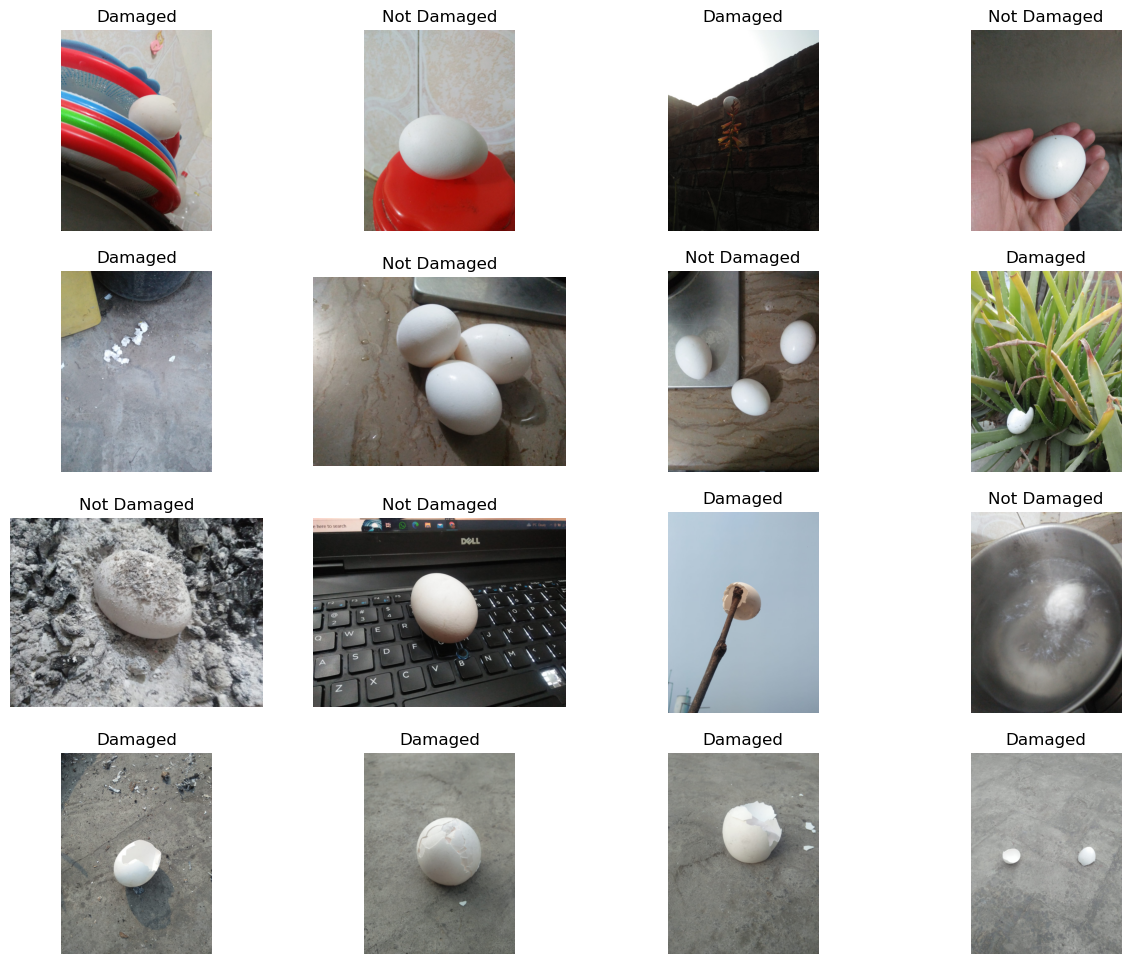

In [129]:
from PIL import Image
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 12))
for i, row in original_df.sample(n=16).reset_index().iterrows():
    plt.subplot(4, 4, i + 1)
    image_path = row['file_paths']
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(row["target_names"])
    plt.axis('off')
plt.show()

### 🏞️ Augmentation 효과 시각화  

> rotation_range=40: 회전 범위 40도
> 
> width_shift_range=0.2: 가로 이동 범위 20%
> 
> height_shift_range=0.2: 세로 이동 범위 20%
> 
> shear_range=0.2: 전단 변형 범위 20%
> 
> zoom_range=0.2: 확대/축소 범위 20%
> 
> horizontal_flip=True: 좌우 반전


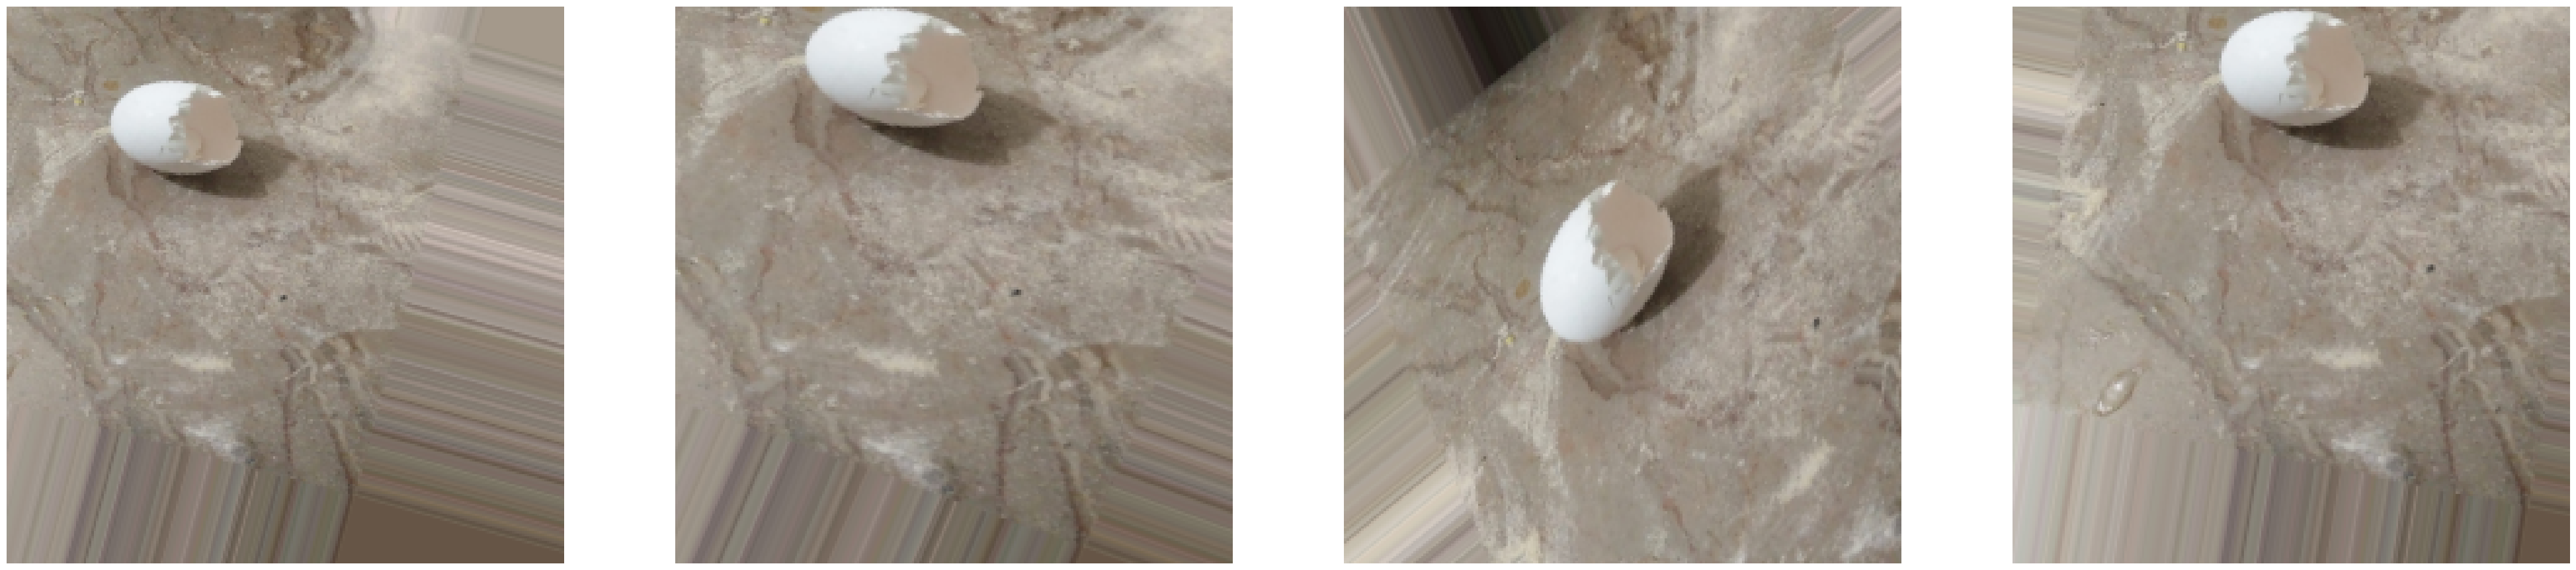

In [130]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 이미지 로드 및 전처리
image = cv2.cvtColor(cv2.imread(original_generator.filepaths[30]), cv2.COLOR_BGR2RGB)
resized_image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

def show_image(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# 데이터 증강 생성기 설정
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# ImageDataGenerator는 배치 사이즈를 포함한 4차원으로 연산되기 때문에
# 기존 image를 한 차원 증가시켜준다.
image_batch = np.expand_dims(resized_image, axis=0)

# fit한 뒤 flow에 다시 넣어준다.
data_generator = datagen.flow(image_batch, batch_size=1)

# N개의 augmentation된 이미지를 시각화하기 위해 subplot을 생성한다.
N_IMAGES = 4
fig, axs = plt.subplots(1, N_IMAGES, figsize=(50, 30))  # 크기를 조정

for i in range(N_IMAGES):
    aug_image_batch = next(data_generator)
    aug_image = np.squeeze(aug_image_batch)
    aug_image = (aug_image * 255).astype('int')  # Rescale back to [0, 255]
    axs[i].imshow(aug_image)
    axs[i].axis('off')

plt.show()


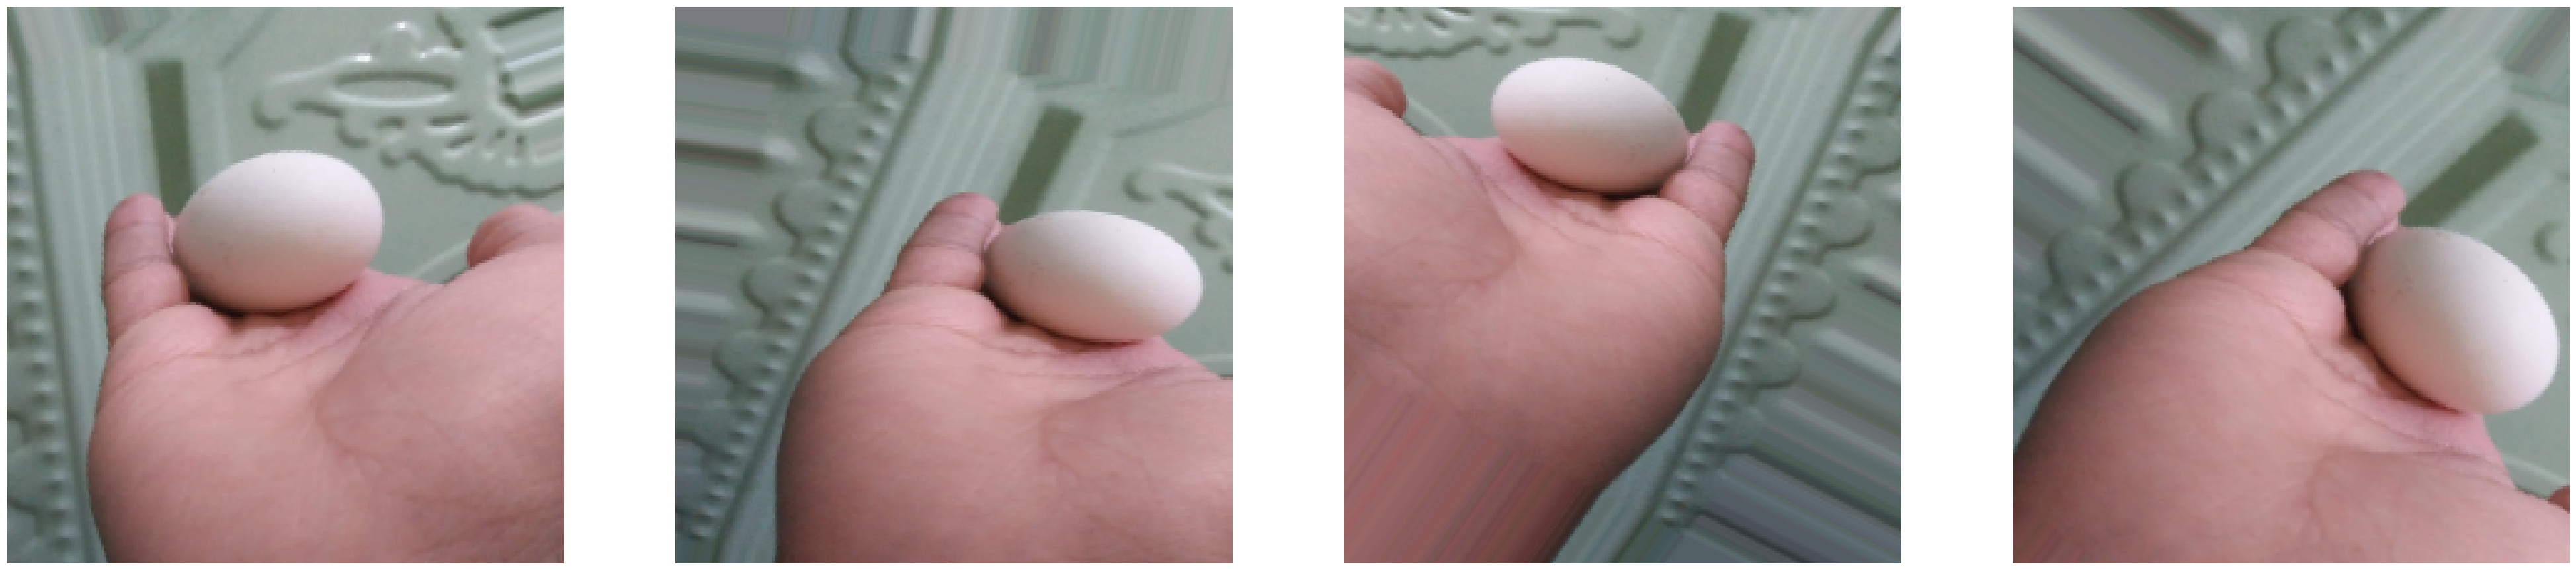

In [131]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 이미지 로드 및 전처리
image = cv2.cvtColor(cv2.imread(original_generator.filepaths[700]), cv2.COLOR_BGR2RGB)
resized_image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

def show_image(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# 데이터 증강 생성기 설정
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# ImageDataGenerator는 배치 사이즈를 포함한 4차원으로 연산되기 때문에
# 기존 image를 한 차원 증가시켜준다.
image_batch = np.expand_dims(resized_image, axis=0)

# fit한 뒤 flow에 다시 넣어준다.
data_generator = datagen.flow(image_batch, batch_size=1)

# N개의 augmentation된 이미지를 시각화하기 위해 subplot을 생성한다.
N_IMAGES = 4
fig, axs = plt.subplots(1, N_IMAGES, figsize=(50, 30))  # 크기를 조정

for i in range(N_IMAGES):
    aug_image_batch = next(data_generator)
    aug_image = np.squeeze(aug_image_batch)
    aug_image = (aug_image * 255).astype('int')  # Rescale back to [0, 255]
    axs[i].imshow(aug_image)
    axs[i].axis('off')

plt.show()

### ✨ 이미지 전처리 기능을 훈련 데이터에 적용시킵니다.

In [194]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet_v2 import preprocess_input

IMAGE_SIZE = 224
BATCH_SIZE = 32

# Custom preprocessing function to combine resnet preprocessing with other augmentations
def custom_preprocess_function(img):
    img = preprocess_input(img)  # Apply ResNetV2 preprocessing
    return img

# Apply ImageDataGenerator with the custom preprocessing function
train_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=custom_preprocess_function
)

validation_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

# Assuming train_df, validation_df, test_df are defined DataFrames
train_flow = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='file_paths',
    y_col='target_names',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=True
)

validation_flow = validation_generator.flow_from_dataframe(
    dataframe=validation_df,
    x_col='file_paths',
    y_col='target_names',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

test_flow = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='file_paths',
    y_col='target_names',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="binary"
)



Found 780 validated image filenames belonging to 2 classes.
Found 196 validated image filenames belonging to 2 classes.
Found 244 validated image filenames belonging to 2 classes.


In [195]:
import numpy as np
from tensorflow.keras.utils import Sequence
from sklearn.utils import shuffle
import cv2

IMAGE_SIZE = 224
BATCH_SIZE = 32

class Dataset(Sequence):
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, preprocess=None, shuffle=False):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        self.preprocess = preprocess
        self.shuffle = shuffle

        if self.shuffle:
            # 에포크 종료 시, 객체 생성 및 데이터 섞기
            self.on_epoch_end()

    # __len__()는 전체 데이터 건수에서 batch_size 단위로 나눈 데이터 수
    # 예를 들어, 1000개의 데이터를 30 batch_size로 설정하면, 1 batch당 33.33..개이다.
    # 이 때, 소수점은 무조건 올려서 33 + 1 = 34개로 설정한다.
    def __len__(self):
        return int(np.ceil(len(self.targets) / self.batch_size))

    # batch_size 단위로 이미지 배열과 타켓 데이터들을 가져온 뒤 변환한 값을 리턴한다.
    def __getitem__(self, index): # 전처리
        file_paths_batch = self.file_paths[index * self.batch_size: (index + 1) * self.batch_size]
        targets_batch = self.targets[index * self.batch_size: (index + 1) * self.batch_size]

        results_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

        for i in range(file_paths_batch.shape[0]):
            image = cv2.cvtColor(cv2.imread(file_paths_batch[i]), cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

            if self.aug is not None:
                image = self.aug(image=image)['image']

            if self.preprocess is not None:
                image = self.preprocess(image)
                    
            results_batch[i] = image

        return results_batch, targets_batch
        
    def on_epoch_end(self):
        if self.shuffle:
            self.file_paths, self.targets = shuffle(self.file_paths, self.targets) 

In [196]:
import albumentations as A
from tensorflow.keras.applications.resnet_v2 import preprocess_input as resnet_preprocess_input

train_file_paths = train_df['file_paths'].values

train_targets = train_df['targets'].values 

validation_file_paths = validation_df['file_paths'].values

validation_targets = validation_df['targets'].values 

test_file_paths = test_df['file_paths'].values

test_targets = test_df['targets'].values 

# aug = A.Compose([
#     A.Rotate(limit=40, p=0.5), 
#     A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0, rotate_limit=0, p=0.5), 
#     A.ShearX(p=0.5),
#     A.ShearY(p=0.5),  
#     A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5)  # RandomBrightnessContrast
# ])


   
train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE,  
                        preprocess=resnet_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet_preprocess_input)

### ✨ 1 Cycle  
> ResNet 사전훈련 모델 훈련

In [197]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(500, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.3)(x)
    output = Dense(1, activation='sigmoid', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [198]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='resnet50', verbose=True)
model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer_5[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_bn        │ (None, 56, 56, 64)        │             256 │ pool1_pool[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_relu      │ (None, 56, 56, 64)        │               0 │ conv2_block1_preact_bn[0]… │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,096 │ conv2_block1_preact_relu[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_pad            │ (None, 58, 58, 64)        │               0 │ conv2_block1_1_relu[0][0]  │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,864 │ conv2_block1_2_pad[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │               

 Total params: 24,589,801 (93.80 MB)

 Trainable params: 24,544,361 (93.63 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [199]:
import gc
gc.collect()

43754

In [200]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

In [201]:
N_EPOCHS = 10

history = model.fit(train_dataset, 
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/10


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 134s 4s/step - acc: 0.5100 - loss: 0.7940 - val_acc: 0.7551 - val_loss: 0.5595 - learning_rate: 1.0000e-05
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 172s 7s/step - acc: 0.6804 - loss: 0.5892 - val_acc: 0.8724 - val_loss: 0.4420 - learning_rate: 1.0000e-05
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 180s 7s/step - acc: 0.7831 - loss: 0.4845 - val_acc: 0.8724 - val_loss: 0.3618 - learning_rate: 1.0000e-05
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 178s 7s/step - acc: 0.8460 - loss: 0.3787 - val_acc: 0.9133 - val_loss: 0.2927 - learning_rate: 1.0000e-05
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 179s 7s/step - acc: 0.9211 - loss: 0.2902 - val_acc: 0.9439 - val_loss: 0.2418 - learning_rate: 1.0000e-05
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 179s 7s/step - acc: 0.9459 - loss: 0.2345 - val_acc: 0.9490 - val_loss: 0.2036 - learning_rate: 1.0000e-05
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 178s 7s/step - acc: 0.9701 - loss: 0.1836 - val_acc: 0.9643 - val_loss: 0.1703 - learning_rate: 1.0000e

In [202]:
model.evaluate(test_dataset, batch_size=BATCH_SIZE)

8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - acc: 0.9668 - loss: 0.1352


[0.1273988038301468, 0.9672130942344666]

#### ✨ evaluate를 통해 test 데이터의 성능을 보았을 때 역시 acc값이 0.96으로 매우 좋은 수치를 보여주었습니다.

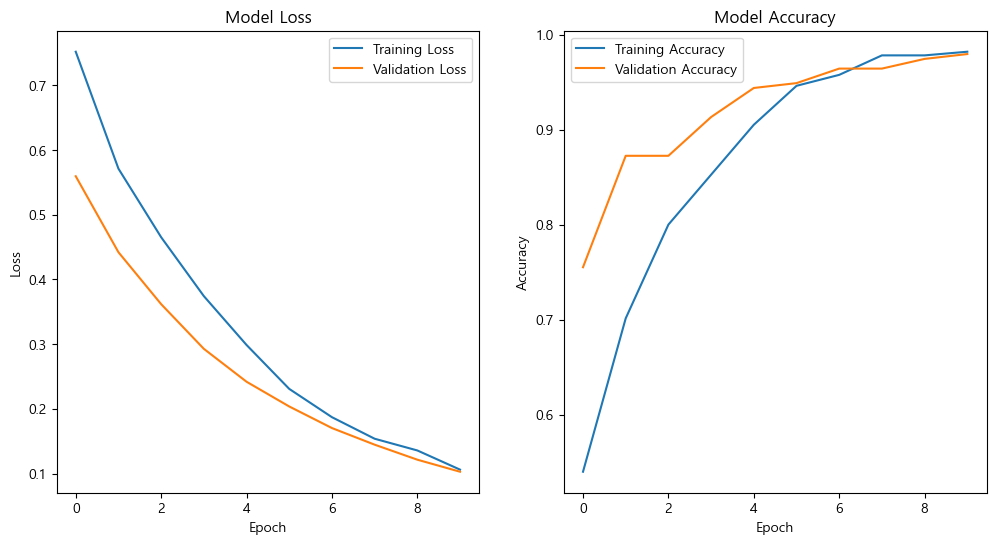

In [213]:
import numpy as np

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### 📌 Chat Graph Image Result
> 사전훈련모델의 훈련데이터와 검증데이터 간의 손실값과 정확도를 Epoch 횟수별로 시각화하였습니다.
>
> 그 결과 훈련 데이터와 검증 데이터 모두 acc 값이 0.97~0.98에 해당하는 아주 높은 수치의 성능을 보여주었습니다.  

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


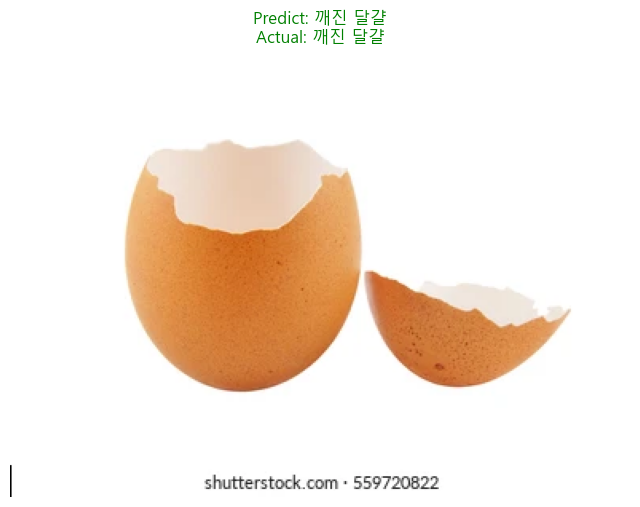

In [204]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet_v2 import preprocess_input

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 이미지 로드 및 전처리
IMAGE_PATH = './datasets/egg_test/Damaged/test5.png'
IMAGE_SIZE = 224  

image = cv2.cvtColor(cv2.imread(IMAGE_PATH), cv2.COLOR_BGR2RGB)
resized_image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
resized_image = preprocess_input(resized_image)
resized_image = np.expand_dims(resized_image, axis=0)

class_names = ['깨진 달걀', '안깨진 달걀']
prediction = model.predict(resized_image, batch_size=32)
predicted_class = class_names[int(prediction[0][0] > 0.5)]  # 예측값이 0.5보다 크면 '안깨짐', 작으면 '깨짐'

# 실제 값 설정
actual_class = '깨진 달걀'

# 예측이 실제와 일치하는지 여부에 따라 텍스트 색상 설정
color = 'green' if predicted_class == actual_class else 'red'

# 이미지 시각화
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.title(f"Predict: {predicted_class}\nActual: {actual_class}", color=color)
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


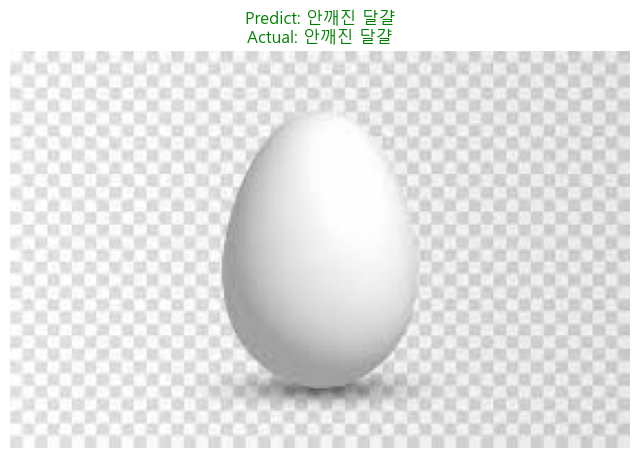

In [206]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet_v2 import preprocess_input

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


# 이미지 로드 및 전처리
IMAGE_PATH = './images/Screenshot/egg.jpg'
IMAGE_SIZE = 224  

image = cv2.cvtColor(cv2.imread(IMAGE_PATH), cv2.COLOR_BGR2RGB)
resized_image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
resized_image = preprocess_input(resized_image)
resized_image = np.expand_dims(resized_image, axis=0)

class_names = ['깨진 달걀', '안깨진 달걀']
prediction = model.predict(resized_image, batch_size=32)
predicted_class = class_names[int(prediction[0][0] > 0.5)]  # 예측값이 0.5보다 크면 '안깨짐', 작으면 '깨짐'

# 실제 값 설정 
actual_class = '안깨진 달걀'

# 예측이 실제와 일치하는지 여부에 따라 텍스트 색상 설정
color = 'green' if predicted_class == actual_class else 'red'

# 이미지 시각화
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.title(f"Predict: {predicted_class}\nActual: {actual_class}", color=color)
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


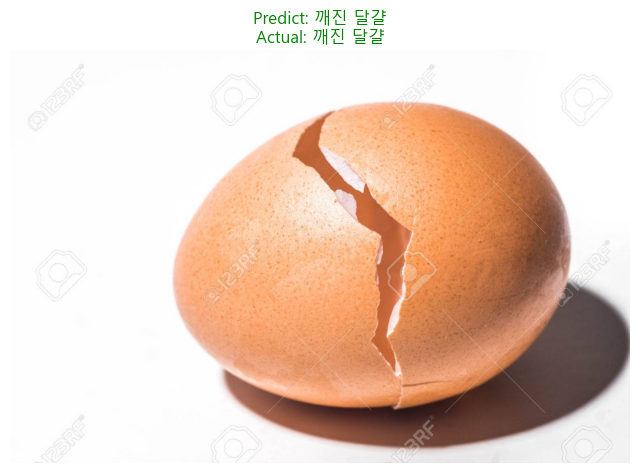

In [218]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet_v2 import preprocess_input

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


# 이미지 로드 및 전처리
IMAGE_PATH = './images/Screenshot/14egg.jpg'
IMAGE_SIZE = 224  

image = cv2.cvtColor(cv2.imread(IMAGE_PATH), cv2.COLOR_BGR2RGB)
resized_image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
resized_image = preprocess_input(resized_image)
resized_image = np.expand_dims(resized_image, axis=0)

class_names = ['깨진 달걀', '안깨진 달걀']
prediction = model.predict(resized_image, batch_size=32)
predicted_class = class_names[int(prediction[0][0] > 0.5)]  # 예측값이 0.5보다 크면 '안깨짐', 작으면 '깨짐'

# 실제 값 설정 
actual_class = '깨진 달걀'

# 예측이 실제와 일치하는지 여부에 따라 텍스트 색상 설정
color = 'green' if predicted_class == actual_class else 'red'

# 이미지 시각화
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.title(f"Predict: {predicted_class}\nActual: {actual_class}", color=color)
plt.axis('off')
plt.show()

### 🚩 모델 Predict 결과  
> 해당 훈련된 모델을 통해 인터넷에서 가져온 두 종류의 계란을 예측하였을 때, 모두 잘 맞히는 것을 볼 수 있었습니다.

### ✨ 1 Cycle Result  
> ResNet 사전훈련 모델을 사용하여, 계란 이미지 이진분류 데이터세트의 훈련 결과와 평가 결과를 확인 하였을 때, 매우 좋은 성능을 보이는 것을 알 수 있고, 이를 통해 ResNet 사전훈련 모델과의 유사도가 높음을 알 수 있었습니다.

### 💡 2 Cycle
> 💡 성능 결과가 좋게 나온 ResNet 사전훈련 모델을 활용하여 미세조정(Fine Tuning) 진행

#### 📌 모델 레이어(층) 구조를 확인

In [219]:
model.layers

[<InputLayer name=input_layer_5, built=True>,
 <ZeroPadding2D name=conv1_pad, built=True>,
 <Conv2D name=conv1_conv, built=True>,
 <ZeroPadding2D name=pool1_pad, built=True>,
 <MaxPooling2D name=pool1_pool, built=True>,
 <BatchNormalization name=conv2_block1_preact_bn, built=True>,
 <Activation name=conv2_block1_preact_relu, built=True>,
 <Conv2D name=conv2_block1_1_conv, built=True>,
 <BatchNormalization name=conv2_block1_1_bn, built=True>,
 <Activation name=conv2_block1_1_relu, built=True>,
 <ZeroPadding2D name=conv2_block1_2_pad, built=True>,
 <Conv2D name=conv2_block1_2_conv, built=True>,
 <BatchNormalization name=conv2_block1_2_bn, built=True>,
 <Activation name=conv2_block1_2_relu, built=True>,
 <Conv2D name=conv2_block1_0_conv, built=True>,
 <Conv2D name=conv2_block1_3_conv, built=True>,
 <Add name=conv2_block1_out, built=True>,
 <BatchNormalization name=conv2_block2_preact_bn, built=True>,
 <Activation name=conv2_block2_preact_relu, built=True>,
 <Conv2D name=conv2_block2_1_con

In [220]:
# freeze 확인하기
for i, layer in enumerate(model.layers[:-5]):
    layer.trainable = False
    print(i + 1, '.', layer.name, 'trainable:', layer.trainable)

print('\n######### classifier layers ######### ')
for layer in model.layers[-5:]:
    print(layer.name, 'trainable:', layer.trainable)

1 . input_layer_5 trainable: False
2 . conv1_pad trainable: False
3 . conv1_conv trainable: False
4 . pool1_pad trainable: False
5 . pool1_pool trainable: False
6 . conv2_block1_preact_bn trainable: False
7 . conv2_block1_preact_relu trainable: False
8 . conv2_block1_1_conv trainable: False
9 . conv2_block1_1_bn trainable: False
10 . conv2_block1_1_relu trainable: False
11 . conv2_block1_2_pad trainable: False
12 . conv2_block1_2_conv trainable: False
13 . conv2_block1_2_bn trainable: False
14 . conv2_block1_2_relu trainable: False
15 . conv2_block1_0_conv trainable: False
16 . conv2_block1_3_conv trainable: False
17 . conv2_block1_out trainable: False
18 . conv2_block2_preact_bn trainable: False
19 . conv2_block2_preact_relu trainable: False
20 . conv2_block2_1_conv trainable: False
21 . conv2_block2_1_bn trainable: False
22 . conv2_block2_1_relu trainable: False
23 . conv2_block2_2_pad trainable: False
24 . conv2_block2_2_conv trainable: False
25 . conv2_block2_2_bn trainable: False


### 💡 미세조정 시행  
> 유사도는 높지만, 데이터 수가 적으므로, 분류기를 제외한 Conv층은 전부 Freeze를 시행하였습니다.

In [221]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
/from tensorflow.keras.applications.resnet_v2 import preprocess_input as resnet_preprocess_input
from tensorflow.keras import layers

IMAGE_SIZE = 224
BATCH_SIZE = 32

def fine_tune(datas, model_name, aug, preprocess):
    FIRST_EPOCHS = 10
    SECOND_EPOCHS = 10
    
    train_file_paths, train_targets, \
    validation_file_paths, validation_targets, \
    test_file_paths, test_targets = datas

    train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=resnet_preprocess_input, 
                        shuffle=True)

    validation_dataset = Dataset(validation_file_paths, 
                            validation_targets, 
                            batch_size=BATCH_SIZE, 
                            preprocess=resnet_preprocess_input)
    
    
    model = create_model(model_name=model_name, verbose=True)
    model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

    # feature extractor layer들을 전부 freeze
    for layer in model.layers[:-5]:
        layer.trainable = False

    model.fit(train_dataset, 
              batch_size=BATCH_SIZE, 
              epochs=FIRST_EPOCHS, 
              validation_data=validation_dataset)

    # 배치 정규화만 freeze 진행
    for layer in model.layers:
        layer.trainable = False
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True

    # # 부분 freeze 진행
    # for layer in model.layers[:85]:
    #     layer.trainable = False

    ## augmentation을 하였어도, 기존 데이터 수가 워낙 작았기 때문에, 파인 튜닝 시 Conv2D 부분 전체 Freeze 시행 
    
    model.compile(optimizer=Adam(0.000001), loss=BinaryCrossentropy(), metrics=['acc'])
    history = model.fit(train_dataset, 
              batch_size=BATCH_SIZE, 
              epochs=SECOND_EPOCHS, 
              validation_data=validation_dataset)
    
    return model, history

In [223]:
import albumentations as A
from tensorflow.keras.applications.resnet_v2 import preprocess_input as resnet_preprocess_input

train_file_paths = train_df['file_paths'].values
train_targets = train_df['targets'].values

validation_file_paths = validation_df['file_paths'].values
validation_targets = validation_df['targets'].values

test_file_paths = test_df['file_paths'].values
test_targets = test_df['targets'].values

aug = A.Compose([
    A.ShiftScaleRotate(p=0.5), # 
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
])

model, history = fine_tune((train_file_paths, train_targets,
                            validation_file_paths, validation_targets,
                            test_file_paths, test_targets),
                            'resnet50', 
                            aug,
                            resnet_preprocess_input)

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer_7[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_bn        │ (None, 56, 56, 64)        │             256 │ pool1_pool[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_relu      │ (None, 56, 56, 64)        │               0 │ conv2_block1_preact_bn[0]… │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,096 │ conv2_block1_preact_relu[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_pad            │ (None, 58, 58, 64)        │               0 │ conv2_block1_1_relu[0][0]  │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,864 │ conv2_block1_2_pad[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │               

 Total params: 24,589,801 (93.80 MB)

 Trainable params: 24,544,361 (93.63 MB)

 Non-trainable params: 45,440 (177.50 KB)

Epoch 1/10


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - acc: 0.6705 - loss: 1.1024 - val_acc: 0.9286 - val_loss: 0.1762
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - acc: 0.9094 - loss: 0.2094 - val_acc: 0.9643 - val_loss: 0.1061
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - acc: 0.9390 - loss: 0.1658 - val_acc: 0.9745 - val_loss: 0.0873
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 66s 3s/step - acc: 0.9304 - loss: 0.1613 - val_acc: 0.9796 - val_loss: 0.0791
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - acc: 0.9502 - loss: 0.1661 - val_acc: 0.9694 - val_loss: 0.0793
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - acc: 0.9334 - loss: 0.1618 - val_acc: 0.9694 - val_loss: 0.0496
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - acc: 0.9567 - loss: 0.1132 - val_acc: 0.9796 - val_loss: 0.0434
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - acc: 0.9695 - loss: 0.0670 - val_acc: 0.9847 - val_loss: 0.0371
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 66s 3s/step - acc: 0.9651 - loss: 0.1012 - va

### ✨ 2 Cycle Result - 1  
> 확실히 기존 미세조정(Fine Tuning)시행 전 훈련 속도보다 훨씬 빨라진 것을 알 수 있습니다.

<img src='./images/Screenshot/speed.png' width="700">

In [228]:
test_dataset = Dataset(test_file_paths,
                        test_targets,
                        batch_size=BATCH_SIZE,
                        preprocess=resnet_preprocess_input)

model.evaluate(test_dataset, batch_size=BATCH_SIZE)

8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 685ms/step - acc: 0.9953 - loss: 0.0160


[0.014184422791004181, 0.9959016442298889]

#### ✨ 테스트 데이터 또한 예측 정확도가 0.99로 매우 높은 성능을 보여주었습니다.

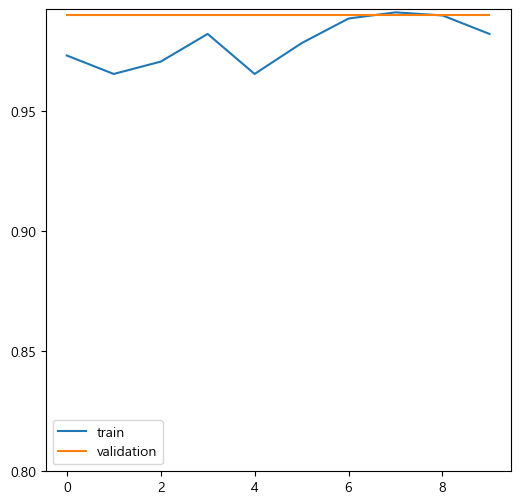

In [240]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.yticks(np.arange(0.8, 1, 0.05))
    plt.legend()
    
show_history(history)

### 📊 Chart Imagenation Result 
> 위 검증데이터와 훈련데이터간의 acc 점수 분포 그래프를 보시면, 검증 데이터의 경우 acc값이 0.98로 일정한 것을 볼 수 있으며, 훈련 데이터의 경우 검증데이터에 비해 큰 변화폭이 있는 것 같지만, 0.96~0.98 사이의 범위에서 나타나는 것이므로, 큰 변화는 없다고 볼 수 있습니다. 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


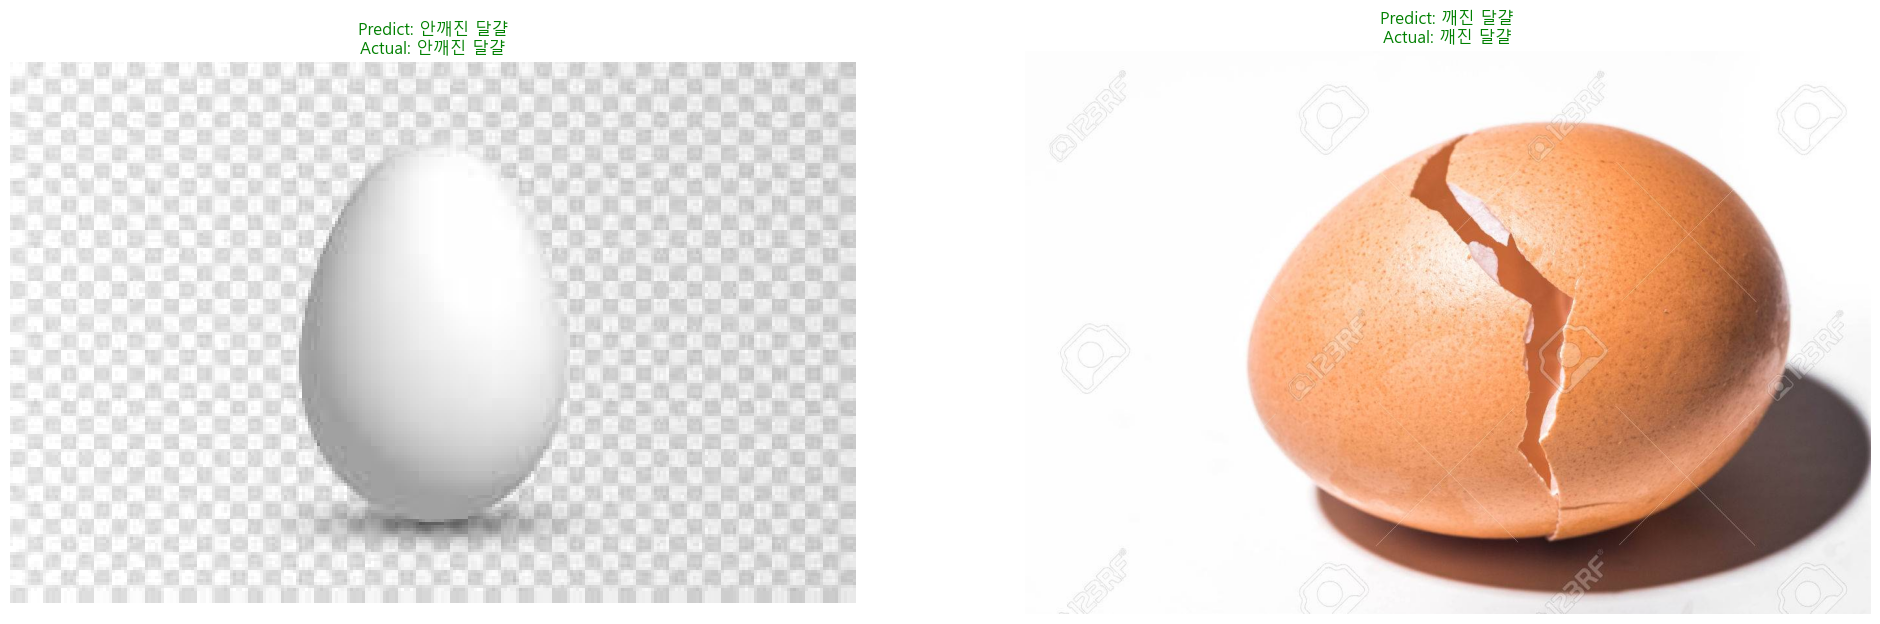

In [245]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet_v2 import preprocess_input

# 설정
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

IMAGE_SIZE = 224  
class_names = ['깨진 달걀', '안깨진 달걀']

def load_and_preprocess_image(image_path):
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
    resized_image = preprocess_input(resized_image)
    resized_image = np.expand_dims(resized_image, axis=0)
    return image, resized_image

def predict_and_visualize(image_path, actual_class):
    image, resized_image = load_and_preprocess_image(image_path)
    prediction = model.predict(resized_image, batch_size=32)
    predicted_class = class_names[int(prediction[0][0] > 0.5)]  # 예측값이 0.5보다 크면 '안깨진 달걀', 작으면 '깨진 달걀'
    color = 'green' if predicted_class == actual_class else 'red'
    return image, predicted_class, actual_class, color

# 이미지 경로와 실제 클래스 설정
images_info = [
    ('./images/Screenshot/egg.jpg', '안깨진 달걀'),
    ('./images/Screenshot/14egg.jpg', '깨진 달걀')
]

# 시각화
fig, axs = plt.subplots(1, 2, figsize=(24, 8))

for idx, (image_path, actual_class) in enumerate(images_info):
    image, predicted_class, actual_class, color = predict_and_visualize(image_path, actual_class)
    axs[idx].imshow(image)
    axs[idx].set_title(f"Predict: {predicted_class}\nActual: {actual_class}", color=color)
    axs[idx].axis('off')

plt.show()


### ✨ 2 Cycle Result  
> ResNet 사전훈련모델에서 Fine Tuning (미세조정)을 실시한 모델의 경우, 안깨진 계란과 깨진 계란을 잘 예측하는 것을 볼 수 있었습니다. 이 결과는 모델이 효과적으로 두 클래스 간의 차이를 학습했음을 알 수 있습니다. 또한, 데이터 증강 기법을 적용하여 훈련 데이터의 다양성을 증가시킨 것이 모델의 성능 향상에 기여했음을 알 수 있었습니다.

### 🚩 Total Result  
> 이번 프로젝트를 통해 ResNet 사전훈련모델을 사용한 Fine Tuning의 효과를 확인할 수 있었으며, 특히 깨진 계란과 안깨진 계란을 구별하는 데 있어 매우 높은 정확도를 달성할 수 있었습니다. 이러한 결과는 Fine Tuning과 데이터 증강이 모델 성능 향상과 빠른 훈련 속도에 중요한 역할을 한다는 것을 보여줍니다. 앞으로도 다양한 사전훈련모델과 데이터를 활용하여 더 많은 실험을 통해 모델의 성능을 지속적으로 개선할 수 있을 것입니다.